In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **LOADING LIBRARIES**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pycountry
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

### **LOADING DATA AND CLEANING**

In [ ]:
data = pd.read_csv('master.csv')

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [ ]:
#Country-year data is repeation and unncessary
data = data.drop('country-year', axis=1)

**Renaming some columns for better understanding**

In [ ]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
data.rename(columns={' gdp_for_year ($) ':'gdp_for_year_dollars'}, inplace=True)
data.rename(columns={'gdp_per_capita ($)':'gdp_per_capita_dollars'}, inplace=True)
data.rename(columns={'suicides/100k pop':'sucides_per_100k_population'}, inplace=True)
data.rename(columns={'HDI for year':'human_dev_index _per_year'}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      27820 non-null  object 
 1   year                         27820 non-null  int64  
 2   sex                          27820 non-null  object 
 3   age                          27820 non-null  object 
 4   suicides_no                  27820 non-null  int64  
 5   population                   27820 non-null  int64  
 6   sucides_per_100k_population  27820 non-null  float64
 7   human_dev_index _per_year    8364 non-null   float64
 8   gdp_for_year_dollars         27820 non-null  object 
 9   gdp_per_capita_dollars       27820 non-null  int64  
 10  generation                   27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


**Checking null values**

In [ ]:
data.isnull().sum()

country                            0
year                               0
sex                                0
age                                0
suicides_no                        0
population                         0
sucides_per_100k_population        0
human_dev_index _per_year      19456
gdp_for_year_dollars               0
gdp_per_capita_dollars             0
generation                         0
dtype: int64

Human Development Index per year column has 19456 null value which is about 70%. Dropping this column sounds good

In [ ]:
data = data.drop('human_dev_index _per_year', axis = 1)

**Checking and Removing duplicates**

In [ ]:
data.duplicated().sum()

0

**DATA VISUALIZATION**

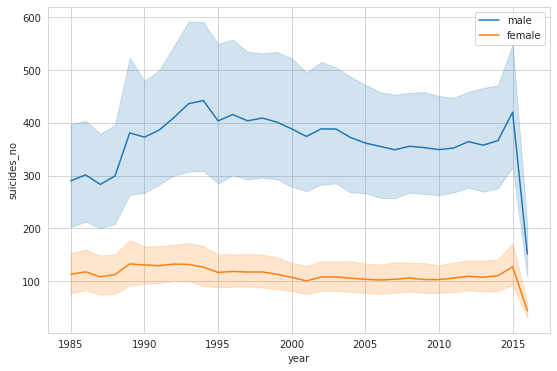

In [ ]:
male = data[data.sex == "male"]
female = data[data.sex == "female"]
plt.figure(figsize=(9,6))
sns.lineplot(male.year, data.suicides_no)
sns.lineplot(female.year, data.suicides_no)
plt.legend(["male", 'female'])
plt.show()

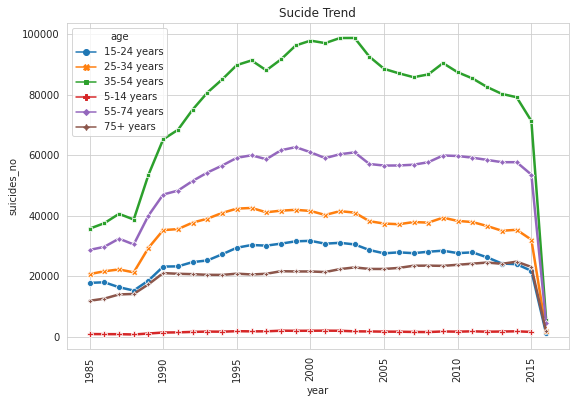

In [ ]:
age = data.groupby(["year","age"])["suicides_no", "population"].sum()
age= age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", age.suicides_no, hue = "age", data = age, linewidth = 2.5, style = "age", markers=True, dashes=False)
plt.xticks(rotation = 90)
plt.title('Sucide Trend')
plt.show()

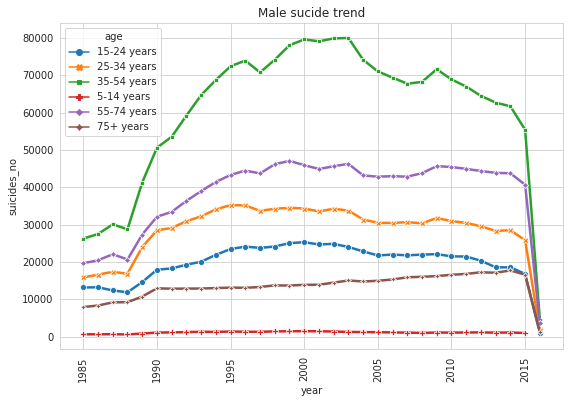

In [ ]:
male_age = male.groupby(["year","age"])["suicides_no", "population"].sum()
male_age= male_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", male_age.suicides_no, hue = "age", data = male_age, linewidth = 2.5, style = "age", markers=True, dashes=False)
plt.xticks(rotation = 90)
plt.title('Male sucide trend')
plt.show()

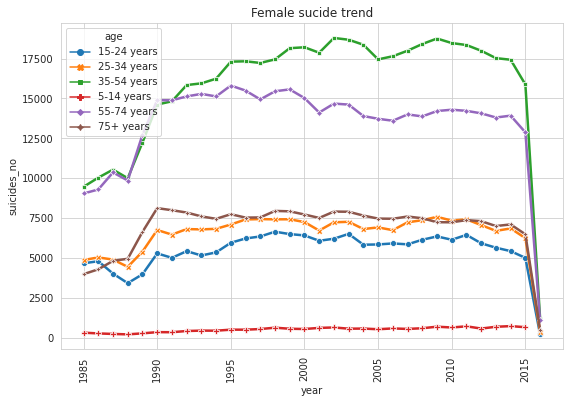

In [ ]:
female_age = female.groupby(["year","age"])["suicides_no", "population"].sum()
female_age= female_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", female_age.suicides_no, hue = "age", data = female_age, linewidth = 2.5, style = "age", markers=True, dashes=False)
plt.xticks(rotation = 90)
plt.title('Female sucide trend')
plt.show()

From the gender demography it is apparent that women are more velnuerable to comitting sucide than men. Adults with age range between 35 and 54 and most affected population groups.

In [ ]:
df1 = data.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
len(country_name)

101

In [ ]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [ ]:
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Czech Republic',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines']

In [ ]:
data.replace("Republic of Korea", "Korea, Republic of", inplace = True)
data.replace('Czech Republic', "Czechia", inplace = True)
data.replace('Macau', 'Macao', inplace = True)
data.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

In [ ]:
df_suino = data.groupby(["country","year"])["suicides_no"].sum().sort_index(ascending=True)
df_pop = data.groupby(["country","year"]).population.sum().sort_index(ascending=False)
df_total = (df_suino / df_pop)*1000
df_total.head(10)

country  year
Albania  1987    0.026941
         1988    0.022791
         1989    0.024259
         1992    0.016652
         1993    0.026004
         1994    0.017548
         1995    0.030309
         1996    0.030270
         1997    0.057099
         1998    0.051117
dtype: float64

In [ ]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

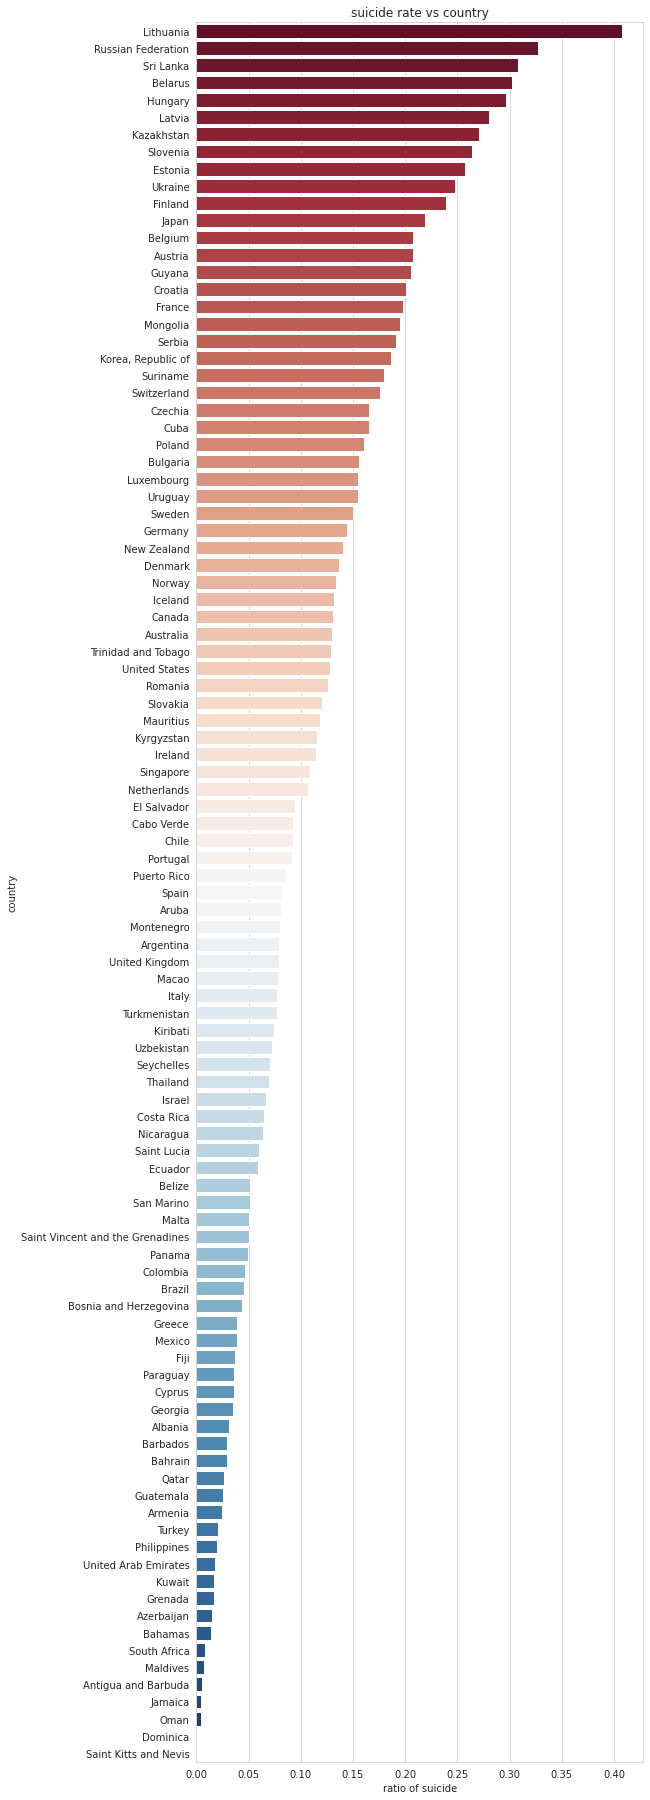

In [ ]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="RdBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.show()

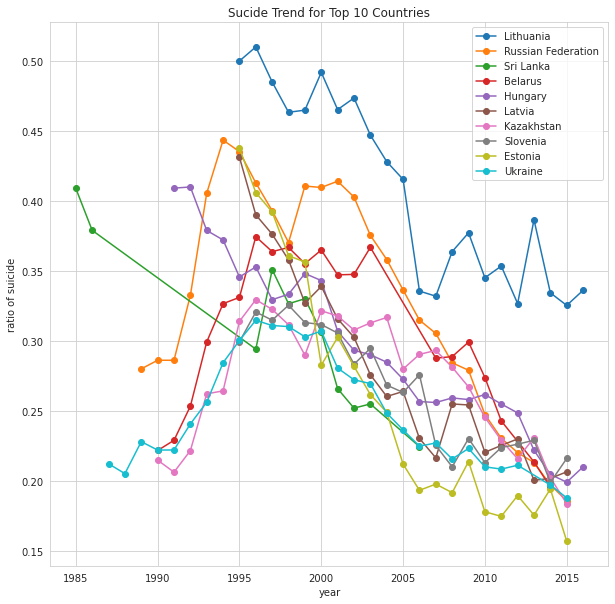

In [ ]:
plt.figure(figsize = (10,10))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.title('Sucide Trend for Top 10 Countries')
plt.legend()
plt.show()

### **CORRELATION**

In [ ]:
data_corr = data.corr()
data_corr

,country,year,sex,age,suicides_no,population,sucides_per_100k_population,gdp_for_year_dollars,gdp_per_capita_dollars,generation
country,1.000000e+00,2.472110e-02,-5.422052e-15,2.061939e-05,0.111762,0.152598,0.047622,5.404905e-02,5.590717e-02,6.705968e-03
year,2.472110e-02,1.000000e+00,-1.577200e-16,-5.858810e-04,-0.004546,0.008850,-0.039037,-6.110479e-02,3.391343e-01,2.683006e-01
sex,-5.422052e-15,-1.577200e-16,1.000000e+00,-1.335911e-18,0.144629,-0.011242,0.391496,-2.698648e-16,-2.964946e-16,-2.929210e-17
age,2.061939e-05,-5.858810e-04,-1.335911e-18,1.000000e+00,-0.018256,-0.093361,0.187215,1.180005e-04,-1.567976e-04,2.148529e-01
suicides_no,1.117624e-01,-4.545958e-03,1.446292e-01,-1.825626e-02,1.000000,0.616162,0.306604,-1.361862e-02,6.132975e-02,-7.062371e-02
population,1.525978e-01,8.850170e-03,-1.124208e-02,-9.336148e-02,0.616162,1.000000,0.008285,-2.774661e-02,8.150986e-02,-6.796261e-02
sucides_per_100k_population,4.762158e-02,-3.903680e-02,3.914965e-01,1.872146e-01,0.306604,0.008285,1.000000,-1.000955e-02,1.785134e-03,-4.982007e-02
gdp_for_year_dollars,5.404905e-02,-6.110479e-02,-2.698648e-16,1.180005e-04,-0.013619,-0.027747,-0.010010,1.000000e+00,-3.202702e-02,-1.636544e-02
gdp_per_capita_dollars,5.590717e-02,3.391343e-01,-2.964946e-16,-1.567976e-04,0.061330,0.081510,0.001785,-3.202702e-02,1.000000e+00,8.289921e-02
generation,6.705968e-03,2.683006e-01,-2.929210e-17,2.148529e-01,-0.070624,-0.067963,-0.049820,-1.636544e-02,8.289921e-02,1.000000e+00


In [ ]:
data_corr = data_corr[:][:]
data_corr[abs(data_corr)<1].sort_values(ascending =False)

population                     0.616162
sucides_per_100k_population    0.306604
sex                            0.144629
country                        0.111762
gdp_per_capita_dollars         0.061330
year                          -0.004546
gdp_for_year_dollars          -0.013619
age                           -0.018256
generation                    -0.070624
Name: suicides_no, dtype: float64

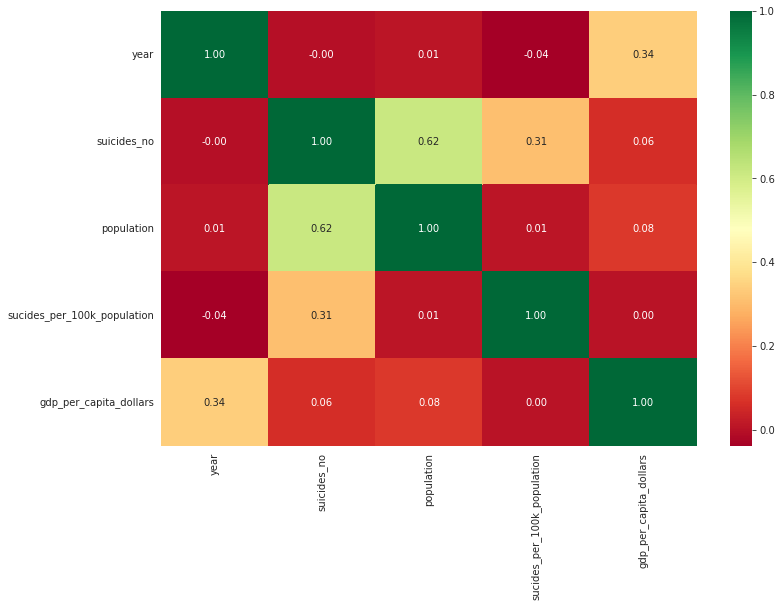

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', fmt='.2f')

### **ENCODING CATEGORICAL VARIABLES**

In [ ]:
data.select_dtypes(include=['object'])

,country,sex,age,gdp_for_year_dollars,generation
0,Albania,male,15-24 years,"2,156,624,900",Generation X
1,Albania,male,35-54 years,"2,156,624,900",Silent
2,Albania,female,15-24 years,"2,156,624,900",Generation X
3,Albania,male,75+ years,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,"2,156,624,900",Boomers
...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,"63,067,077,179",Generation Z


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['country'] = encode.fit_transform(data['country'])
data['sex'] = encode.fit_transform(data['sex'])
data['age'] = encode.fit_transform(data['age'])
data['gdp_for_year_dollars'] =encode.fit_transform(data['gdp_for_year_dollars'])
data['generation'] = encode.fit_transform(data['generation'])

In [ ]:
data

,country,year,sex,age,suicides_no,population,sucides_per_100k_population,gdp_for_year_dollars,gdp_per_capita_dollars,generation
0,0,1987,1,0,21,312900,6.71,726,796,2
1,0,1987,1,2,16,308000,5.19,726,796,5
2,0,1987,0,0,14,289700,4.83,726,796,2
3,0,1987,1,5,1,21800,4.59,726,796,1
4,0,1987,1,1,9,274300,3.28,726,796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,2014,0,2,107,3620833,2.96,1936,2309,2
27816,100,2014,0,5,9,348465,2.58,1936,2309,5
27817,100,2014,1,3,60,2762158,2.17,1936,2309,3
27818,100,2014,0,3,44,2631600,1.67,1936,2309,3


### **SPLITTING DATA INTO TRAINING AND TEST SETS**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20)

In [ ]:
X_train = train.drop(['suicides_no', 'sucides_per_100k_population'], axis = 1)
y_train = train['suicides_no']           
print('Dimension of train_x dataframe:',X_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)

Dimension of train_x dataframe: (22256, 8)
Dimension of train_y dataframe: (22256,)


In [ ]:
X_test = test.drop(['suicides_no', 'sucides_per_100k_population'], axis = 1)
y_test = test['suicides_no']           
print('Dimension of train_x dataframe:',X_test.shape)
print('Dimension of train_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (5564, 8)
Dimension of train_y dataframe: (5564,)


### **MODEL TRAINING and TESTING**

### **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt
model_pred = regressor.predict(X_test)
model_score= regressor.score(X_test, y_test)
print("MSE : ", mean_squared_error(y_test, model_pred))
print("r2 : ", r2_score(y_test, model_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, model_pred)))

MSE :  561905.4077635255
r2 :  0.3398765236828628
RMSE :  749.6035003677114


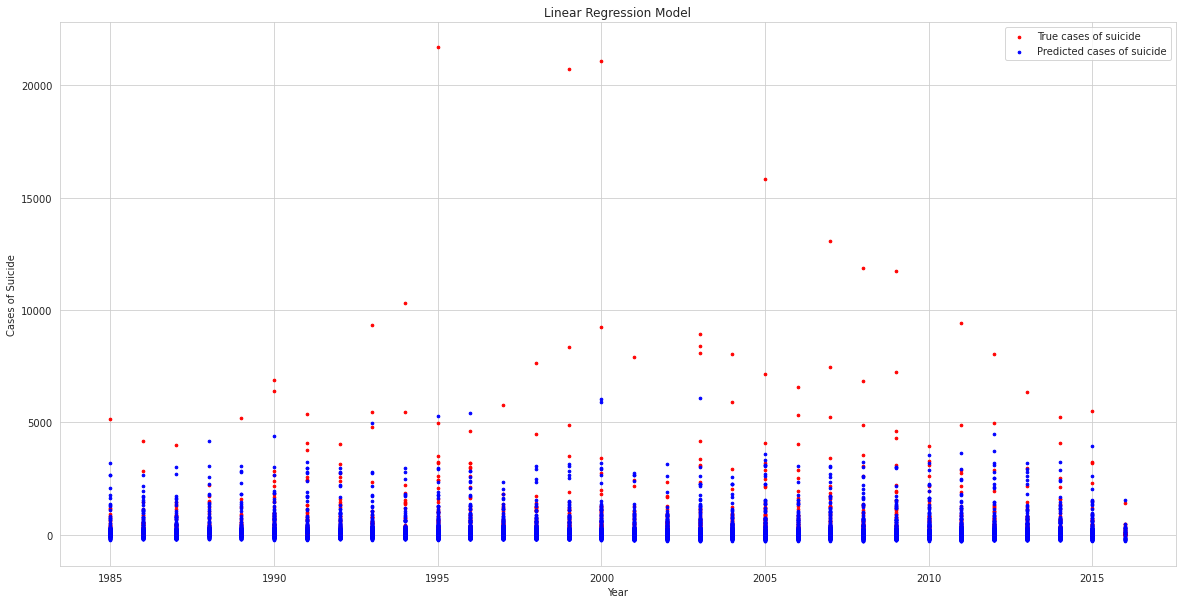

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(X_test.year, y_test, label = "True cases of suicide", s=7, color="red")
plt.scatter(X_test.year, model_pred, label = "Predicted cases of suicide", s=7, color="blue")
plt.xlabel('Year')
plt.ylabel('Cases of Suicide')
plt.title('Linear Regression Model')
plt.legend()
plt.show();

### **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfm = RandomForestRegressor()
rfm.fit(X_train, y_train)
rfm.score(X_train, y_train)

0.9969498058042792

In [ ]:
y_pred = rfm.predict(X_test)
print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 Score: ",r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE :  40850.47503495686
r2 Score:  0.9520090797904711
RMSE:  202.11500447754207


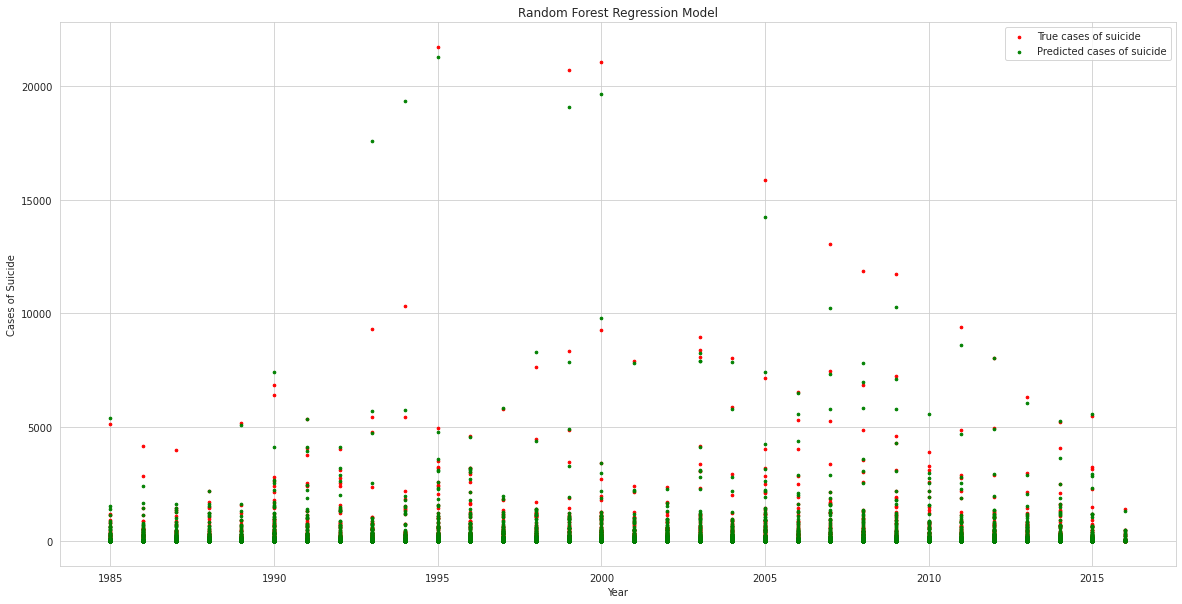

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(X_test.year, y_test, label = "True cases of suicide", s=7, color="red")
plt.scatter(X_test.year, y_pred, label = "Predicted cases of suicide", s=7, color="green")
plt.xlabel('Year')
plt.ylabel('Cases of Suicide')
plt.title('Random Forest Regression Model')
plt.legend()
plt.show();

### **MODEL DEPLOYMENT**

In [ ]:
data.head()

,country,year,sex,age,suicides_no,population,sucides_per_100k_population,gdp_for_year_dollars,gdp_per_capita_dollars,generation
0,0,1987,1,0,21,312900,6.71,726,796,2
1,0,1987,1,2,16,308000,5.19,726,796,5
2,0,1987,0,0,14,289700,4.83,726,796,2
3,0,1987,1,5,1,21800,4.59,726,796,1
4,0,1987,1,1,9,274300,3.28,726,796,0


In [ ]:
import gradio as gr
def suicide_prediction(country,year,sex,age,population,gdp_for_year_dollars,gdp_per_capita_dollars,generation):
  test = pd.DataFrame({"country": country, "year": year, "sex": sex, "age": age,"population": population, "gdp_for_year_dollars":gdp_for_year_dollars,
                         "gdp_per_capita_dollars": gdp_per_capita_dollars,"generation": generation}, index = [0])
  from sklearn.preprocessing import LabelEncoder
  encode = LabelEncoder()
  test['country'] = encode.fit_transform(test['country'])
  test['sex'] = encode.fit_transform(test['sex'])
  test['age'] = encode.fit_transform(test['age'])
  test['gdp_for_year_dollars'] =encode.fit_transform(test['gdp_for_year_dollars'])
  test['generation'] = encode.fit_transform(test['generation'])
  test_pred = rfm.predict(test)[0]
      
        
  return test_pred
    


gr.Interface(fn=suicide_prediction, inputs=['text','number','text','text','number','number','number','text'], outputs='text').launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://17792.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7fb8e210d350>,
 'http://127.0.0.1:7865/',
 'https://17792.gradio.app')